# Исследование объявлений о продаже квартир

## Введение

**Цель исследования**: определение влияния различных параметров на рыночную стоимость объектов недвижимости.


**Входные данные**: данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет (/datasets/real_estate_data.csv). По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Представлены следующие показатели:

- *airports_nearest* — расстояние до ближайшего аэропорта в метрах (м)
- *balcony* — число балконов
- *ceiling_height* — высота потолков (м)
- *cityCenters_nearest* — расстояние до центра города (м)
- *days_exposition* — сколько дней было размещено объявление (от публикации до снятия)
- *first_day_exposition* — дата публикации
- *floor* — этаж
- *floors_total* — всего этажей в доме
- *is_apartment* — апартаменты (булев тип)
- *kitchen_area* — площадь кухни в квадратных метрах (м²)
- *last_price* — цена на момент снятия с публикации
- *living_area* — жилая площадь в квадратных метрах(м²)
- *locality_name* — название населённого пункта
- *open_plan* — свободная планировка (булев тип)
- *parks_around3000* — число парков в радиусе 3 км
- *parks_nearest* — расстояние до ближайшего парка (м)
- *ponds_around3000* — число водоёмов в радиусе 3 км
- *ponds_nearest* — расстояние до ближайшего водоёма (м)
- *rooms* — число комнат
- *studio* — квартира-студия (булев тип)
- *total_area* — площадь квартиры в квадратных метрах (м²)
- *total_images* — число фотографий квартиры в объявлении

Результаты исследования позволят построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

Выдвинем рабочие гипотезы исходя из поставленных задач:
1. Продажа прошла очень быстро, когда срок снятия объявления составил 7 дней; чрезмерно долго - если объявление было размещалось более 1 года.
2. Стоимость квадратного метра сильнее зависит зависит от количества комнат, чем от площади квартиры.
3. Стоимость квадратного метра сильно зависит от удаленности от центра.
4. Первый и последний этажи предпочитают реже, поэтому их стоимость ниже прочих.
5. Стоимость квадратного метра растет с каждым годом в связи с инфляцией.
6. Стоимость квадратного метра в центре Санкт-Петербурга гораздо выше, чем по всему городу в целом.
7. Стоимость квадратного метра в центре Санкт-Петербурга гораздо больше зависит от площади и числа комнат, чем по всему городу в целом.

## Общий обзор полученных данных

Импортируем библиотеку Pandas, прочтем предоставленный файл и сохраним DataFrame в переменной `realty_data`:

In [1]:
import pandas as pd
realty_data = pd.read_csv('/datasets/real_estate_data.csv')

Выведем и изучим общую информацию о полученных данных, проверим корректность названий столбцов в `realty_data`, и оценим первые 5 строк таблицы:

In [2]:
realty_data.info()
print()
print(realty_data.columns)
print()
display(realty_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around3000	ponds_nearest	days_exposition    23699 non-null object
dtypes: object(1)
memory usage: 185.3+ KB

Index(['total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition'], dtype='object')



,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Данные в предложенном файле .csv представлены одним "слипшимся" столбцом: при формировании массива данных использовался разделитель табуляции, что видно при просмотре названия столбцов. Добавим при прочтении файла соответствующий параметр для разделителя и снова выведем информацию о DataFrame и названиях столбцов:

In [3]:
realty_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
realty_data.info()
print()
print(realty_data.columns)
print()
display(realty_data.head(30))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Столбцы по содержанию соответствуют входной информации. Названия столбцов в целом прописаны корректно: отражают содержание, формат приведен к стандарту, кроме столбца *cityCenters_nearest*, записанного в формате camelСase. Внесем это исправление:

In [4]:
realty_data.rename(columns=lambda x: x.replace('cityCenters_nearest', 'city_centers_nearest'), inplace=True)

print(realty_data.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


**Вывод:**  

Во входных данных *23699* наблюдений, при этом имеются пропущенные данные по 14 столбцам из 22.

Тип данных можно будет поменять по следующим столбцам:
 - замена c *float64* на *int64* (поскольку сущность отраженных данных можно представить целочисленными значениями) - *floors_total*, *balcony*, *airports_nearest*,  *cityCenters_nearest*, *parks_around3000*, *parks_nearest*, *ponds_around3000*, *ponds_nearest*,	*days_exposition*;
 - замена с *object* на *datetime*: *first_day_exposition*.
 
Вызывает вопрос столбец *is_apartment* - по входной информации это должен был быть массив из булевых значений, однако тип данных стоит *object*, при этом данные либо Nan, либо False. Необходимо дополнительная проверка данных.

Также следует уточнить размерность данных по столбцу *last_price*: логичнее всего предположить, что счет ведется в  рублях, но прямая информация об этом отсутствует.

## Предобработка данных

### Поиск и обработка пропусков

Найдем пропущенные значения в realty_data, используя методы isnull()/isna() и определим их количество.

In [5]:
print(realty_data.isnull().sum())
#print()
#print(realty_data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Проверим данные по каждому столбцу:

- ####  *'total_images'*

In [6]:
#print(realty_data['total_images'].value_counts()) # считаем количество уникальных значений
print(realty_data['total_images'].unique()) # вывод уникальных значений
#display(realty_data.sort_values('total_images', ascending=False)) # вывод DataFrame с сортировкой по столбцу в убывающем порядке
#display(realty_data.query('total_images == "NaN"')) # вывод среза по пропущенным значениям
print('Пропущенных значений:', realty_data['total_images'].isna().sum()) # вывод количества пропусков

[20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]
Пропущенных значений: 0


Данные выглядят адекватными. Выделяются наблюдения, у которых совсем не фотографий, и те, в которых количество достигает 50. Пропущенных значений нет.

- ####  *'last_price'*

In [7]:
#print(realty_data['last_price'].value_counts())
#print(realty_data['last_price'].unique())
display(realty_data.sort_values('last_price', ascending=False))
#display(realty_data.query('last_price == "NaN"'))
print('Пропущенных значений:', realty_data['last_price'].isna().sum())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30T00:00:00,7,NaN,10.0,250.0,10,NaN,...,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
14706,15,401300000.0,401.0,2016-02-20T00:00:00,5,NaN,9.0,204.0,9,False,...,24.0,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
1436,19,330000000.0,190.0,2018-04-04T00:00:00,3,3.50,7.0,95.0,5,NaN,...,40.0,NaN,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.40,7.0,258.0,5,NaN,...,70.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16219,14,450000.0,38.5,2018-07-11T00:00:00,2,2.65,2.0,NaN,1,NaN,...,NaN,NaN,деревня Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.0
16274,18,440000.0,40.0,2018-07-10T00:00:00,1,NaN,5.0,NaN,1,NaN,...,NaN,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
17456,7,430000.0,30.4,2019-04-22T00:00:00,1,NaN,2.0,16.0,1,NaN,...,6.0,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,NaN,3.0,NaN,3,NaN,...,NaN,NaN,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0


Пропущенных значений: 0


Большинство данных выглядят адекватными. Сомнения вызывают наблюдения с максимальной и минимальной стоимостью. Пропущенных значений нет.

- ####  *'total_area'*

In [8]:
#print(realty_data['total_area'].value_counts())
#print(realty_data['total_area'].unique())
display(realty_data.sort_values('total_area', ascending=False))
#display(realty_data.query('total_area == "NaN"'))
print('Пропущенных значений:', realty_data['total_area'].isna().sum())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
12859,20,140000000.0,631.2,2019-04-09T00:00:00,7,3.90,4.0,322.3,4,NaN,...,19.5,1.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
3117,19,140000000.0,631.0,2019-03-30T00:00:00,7,NaN,5.0,NaN,5,NaN,...,60.0,NaN,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.40,7.0,258.0,5,NaN,...,70.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,NaN,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19558,2,1686000.0,13.2,2018-12-17T00:00:00,1,NaN,5.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,19891.0,4165.0,1.0,361.0,1.0,155.0,19.0
19807,0,3800000.0,13.0,2018-07-04T00:00:00,1,NaN,5.0,10.0,3,NaN,...,NaN,NaN,Санкт-Петербург,21302.0,1242.0,1.0,592.0,3.0,27.0,9.0
19546,3,1850000.0,13.0,2019-03-11T00:00:00,1,3.40,5.0,NaN,2,False,...,NaN,NaN,Санкт-Петербург,24915.0,5483.0,1.0,644.0,0.0,NaN,24.0
17961,3,1400000.0,13.0,2017-12-03T00:00:00,1,2.60,9.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,14350.0,15945.0,0.0,NaN,1.0,185.0,410.0


Пропущенных значений: 0


Данные выглядят адекватными. Выделяются значения с огромной площадью. Пропущенных значений нет.

Более детально рассмотрим показатель на логику - сдеаем срез, в который попадут наблюдения, по которым общая площадь площадь оказалась меньше суммы площадей жилой и кухни. Выведем эти значения для отправки бизнесу в качестве багрепорта.

In [9]:
total_area_error=realty_data.query('kitchen_area + living_area > total_area')
display(total_area_error.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,NaN,...,6.20,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
545,9,4700000.0,23.80,2018-12-28T00:00:00,1,NaN,18.0,20.00,9,NaN,...,5.00,NaN,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,NaN,...,9.28,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0
601,12,5600000.0,53.70,2017-04-18T00:00:00,2,2.50,12.0,48.30,5,NaN,...,7.00,2.0,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0
696,1,3364930.0,34.69,2014-11-27T00:00:00,1,2.64,25.0,23.43,25,NaN,...,23.43,2.0,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0


- ####  *'first_day_exposition'*

In [10]:
#print(realty_data['first_day_exposition'].value_counts())
print(realty_data['first_day_exposition'].unique())
#display(realty_data.sort_values('first_day_exposition', ascending=False))
#display(realty_data.query('first_day_exposition == "NaN"'))
print('Пропущенных значений:', realty_data['first_day_exposition'].isna().sum())

['2019-03-07T00:00:00' '2018-12-04T00:00:00' '2015-08-20T00:00:00' ...
 '2014-12-29T00:00:00' '2016-09-12T00:00:00' '2015-07-19T00:00:00']
Пропущенных значений: 0


Данные выглядят адекватными. Пропущенных значений нет. Имеет смысл поменять тип данных, используя метод to_datetime.

- ####  *'rooms'*

In [11]:
#print(realty_data['rooms'].value_counts())
print(realty_data['rooms'].unique())
#display(realty_data.sort_values('rooms', ascending=False))
#display(realty_data.query('rooms == "NaN"'))
print('Пропущенных значений:', realty_data['rooms'].isna().sum())

[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]
Пропущенных значений: 0


Большинство данных выглядят адекватными. Сомнения вызывают наблюдения, по которым число комнат равно 0. Вероятно, подразумеваются квартиры-студии, либо квартиры свободной планировки. Имеет смысл уточнить у бизнеса, однако при отсутствии возможности принимаем вариант, что пропущенных значений нет.

- ####  *'ceiling_height'*

In [12]:
#print(realty_data['ceiling_height'].sort_values().value_counts())
print(realty_data['ceiling_height'].unique())
#display(realty_data.sort_values('ceiling_height', ascending=False))
#display(realty_data.query('ceiling_height == "NaN"'))
print('Пропущенных значений:', realty_data['ceiling_height'].isna().sum())

[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9
   3.18   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83
   3.52   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19
   3.24   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37
   3.09   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68
   3.22   3.27  27.     4.1    2.93   3.46  24.     3.47   3.33   3.63
   3.32  26.     1.2    8.3    2.98   2.86   3.17   4.4    3.28   3.04
   4.45   5

В представленных данных имеются 9195 пропусков. Вероятно, в анкетах эти данные были пропущены при заполнении. Также можно выделить крайне низкие (менее 2 м.) и высокие потолки (более 10 м.): здесь причиной таких данных может послужить некорректно поставленая плавающая точка. Однако таких значений немного и на общую картину они не должны повлиять. 

Заменим пропущенные данные медианой, поскольку среднее значение из-за слишком больших и маленьких показателей может их исказить:

In [13]:
#Составим функцию поиска медианного значения по столбцу^
def median_value(column):
    median = column.median()
    return median

#Найдем медианное значение высоты потолка:
print(median_value(realty_data['ceiling_height']))

# Заменим пропуски на медианное значение
realty_data['ceiling_height'] = realty_data['ceiling_height'].fillna(median_value(realty_data['ceiling_height']))

# Проверим, остались ли пропущенные значения:
print('Пропущенных значений:', realty_data['ceiling_height'].isna().sum())

2.65
Пропущенных значений: 0


- ####  *'floors_total'*

In [14]:
#print(realty_data['floors_total'].sort_values().value_counts())
print(realty_data['floors_total'].unique())
#display(realty_data.sort_values('floors_total', ascending=False))
#display(realty_data.query('floors_total == "NaN"'))
print('Пропущенных значений:', realty_data['floors_total'].isna().sum())

[16. 11.  5. 14. 12. 26. 24. 27.  9.  6. 17. 25.  3. 23. 19. 18.  4. 22.
  8.  2. 10.  7. 13. 15. nan 20. 28. 36. 21. 35. 34. 60.  1. 29. 33. 52.
 37.]
Пропущенных значений: 86


В представленных данных имеются 86 пропусков. Вероятно, в анкетах эти поля были пропущены при заполнении, либо предполагалось, что этажность здания соответствует этажу, на котором располагается недвижимость. Посколько объем данных невелик, наиболее логичным будет заполнить пропуски медианным значением, а в случае, когда медиана больше значения по столбцу *floor* - заменить  значениями по столбцу *floor*:

In [15]:
# Заменим пропуски на медианное значение

realty_data['floors_total'] = realty_data['floors_total'].fillna(median_value(realty_data['floors_total']))

# Создадим цикл, меняющий значение этажности здания в случае, когда этаж больше медианного значения:
for i in range(len(realty_data)):
    if realty_data.loc[i, 'floors_total'] < realty_data.loc[i, 'floor']:
        realty_data.loc[i, 'floors_total'] = realty_data.loc[i, 'floor']

# Проверим, есть ли наблюдения, когда этаж квартиры больше этажности здания:
display(realty_data.query('floors_total < floor'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


- ####  *'living_area'*

In [16]:
#print(realty_data['living_area'].value_counts())
print(realty_data['living_area'].unique())
#display(realty_data.sort_values('living_area', ascending=False))
#display(realty_data.query('living_area == "NaN"'))
print('Пропущенных значений:', realty_data['living_area'].isna().sum())

[51.   18.6  34.3  ... 31.65 13.59 42.55]
Пропущенных значений: 1903


В представленных данных имеются 1903 пропусков. Вероятно, в анкетах эти поля были пропущены при заполнении. Посколько объем пропущенных данных составляет более 8%, убирать их будет нецелесообразно. Лучше попросить уточнение у бизнеса. Пока заменим  пропуски медианным значением.

In [17]:
# Заменим пропуски на медианное значение
realty_data['living_area'] = realty_data['living_area'].fillna(median_value(realty_data['living_area']))

# Проверим наличие пропусков после обработки:
print('Пропущенных значений:', realty_data['living_area'].isna().sum())

Пропущенных значений: 0


- ####  *'floor'*

In [18]:
#print(realty_data['floor'].value_counts())
print(realty_data['floor'].unique())
#display(realty_data.sort_values('floor', ascending=False))
#display(realty_data.query('floor == "NaN"'))
print('Пропущенных значений:', realty_data['floor'].isna().sum())

[ 8  1  4  9 13  5  6 22 26  7  3  2 11 15 18 10 19 16 20 27 25 17 14 12
 21 28 24 23 30 29 32 33 31]
Пропущенных значений: 0


Данные выглядят адекватными. Пропущенных значений нет.

- ####  *'is_apartment'*

In [19]:
print(realty_data['is_apartment'].value_counts())
print(realty_data['is_apartment'].unique())
#display(realty_data.sort_values('is_apartment', ascending=False))
#display(realty_data.query('is_apartment != False & is_apartment != True'))
print('Пропущенных значений:', realty_data['is_apartment'].isna().sum())

False    2725
True       50
Name: is_apartment, dtype: int64
[nan False True]
Пропущенных значений: 20924


В представленных данных подавляющее число пропусков -  20924. Вероятно, в анкетах эти поля были пропущены при заполнении. Наиболее логичной заменой кажется заполнение пропусков значением "False": если недвижимость является апартаментами, скорее всего эту информацию бы указали в анкете.

In [20]:
# Заполнение пропусков на значение *False*
realty_data['is_apartment'] = realty_data['is_apartment'].fillna(False)

# проверка
print(realty_data['is_apartment'].value_counts())
print(realty_data['is_apartment'].unique())
print('Пропущенных значений:', realty_data['is_apartment'].isna().sum())

False    23649
True        50
Name: is_apartment, dtype: int64
[False  True]
Пропущенных значений: 0


- ####  *'studio'*

In [21]:
print(realty_data['studio'].value_counts())
print(realty_data['studio'].unique())
#display(realty_data.sort_values('studio', ascending=False))
#display(realty_data.query('studio == "Nan"'))
print('Пропущенных значений:', realty_data['is_apartment'].isna().sum())

False    23550
True       149
Name: studio, dtype: int64
[False  True]
Пропущенных значений: 0


Данные выглядят адекватными. Пропущенных значений нет.

- ####  *'open_plan'*

In [22]:
print(realty_data['open_plan'].value_counts())
print(realty_data['open_plan'].unique())
#display(realty_data.sort_values('open_plan', ascending=False))
#display(realty_data.query('open_plan == "Nan"'))
print('Пропущенных значений:', realty_data['open_plan'].isna().sum())

False    23632
True        67
Name: open_plan, dtype: int64
[False  True]
Пропущенных значений: 0


Данные выглядят адекватными. Пропущенных значений нет.

- ####  *'kitchen_area'*

In [23]:
#print(realty_data['kitchen_area'].value_counts())
print(realty_data['kitchen_area'].unique())
#display(realty_data.sort_values('kitchen_area', ascending=False))
#display(realty_data.query('kitchen_area == "Nan"'))
print('Пропущенных значений:', realty_data['kitchen_area'].isna().sum())

[ 25.    11.     8.3     nan  41.     9.1   14.4   18.9    8.81   6.5
   8.5    6.     9.     5.2    8.     7.6    5.6   12.     5.7    6.1
  19.6   15.     7.     9.2   11.7   13.4   17.     6.3   11.6    8.8
  10.    17.6    7.5    9.5   50.    15.5   10.7   11.1   20.    11.9
  16.     5.3   11.5    7.2    6.2   10.4    7.1    4.9    7.3   11.95
  10.2    6.4    5.5   13.     8.4   23.6   10.8   18.3    5.     8.2
  24.    23.8    6.6   26.85  15.4    7.8   33.8    5.4   12.72  12.2
  19.    12.4    7.9   10.3    9.8   17.5   14.7   20.91  21.3   10.6
  10.9    9.7    7.7   12.5   11.4    8.6   11.24  14.1   15.7   13.29
  14.    12.9   12.7   16.5    9.36  21.5   35.    10.5    8.7   19.3
  21.4   40.    49.2   11.52   8.9    9.6   30.    14.2    8.1   10.44
   4.5   16.3   11.2   18.4    7.4   11.3    9.4   13.1   10.19   7.06
  22.    36.     5.1   18.7    9.9   14.3   18.    23.    19.4   11.8
  13.3   17.7   23.1   10.63  21.1   11.33  13.5   19.5   13.2   17.2
  77.    13.8   

В представленных данных имеются 2278 пропусков. Вероятно, в анкетах эти поля были пропущены при заполнении. Посколько объем пропущенных данных составляет более 9%, убирать их будет нецелесообразно. Лучше попросить уточнение у бизнеса. Пока заменим  пропуски медианным значением.

In [24]:
# Заменим пропуски на медианное значение
realty_data['kitchen_area'] = realty_data['kitchen_area'].fillna(median_value(realty_data['kitchen_area']))

# Проверим наличие пропусков после обработки:
print('Пропущенных значений:', realty_data['kitchen_area'].isna().sum())

# Создадим цикл, который меняет заполненное медианное значение на разницу между общей площадью и площадью кухни для наблюдений, 
# по которым жилая площадь получилась больше общей:
for i in range(len(realty_data)):
    if realty_data.loc[i, 'total_area'] < realty_data.loc[i, 'living_area']:
        realty_data.loc[i, 'living_area'] = realty_data.loc[i, 'total_area'] - realty_data.loc[i, 'kitchen_area']

# Проверим, остались ли такие значения:
display(realty_data.query('kitchen_area >= total_area'))
display(realty_data.query('living_area > total_area'))

Пропущенных значений: 0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


- ####  *'balcony'*

In [25]:
print(realty_data['balcony'].value_counts())
print(realty_data['balcony'].unique())
#display(realty_data.sort_values('balcony', ascending=False))
#display(realty_data.query('balcony == "Nan"'))
print('Пропущенных значений:', realty_data['balcony'].isna().sum())

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64
[nan  2.  0.  1.  5.  4.  3.]
Пропущенных значений: 11519


В представленных данных большое число пропусков -  11519. Вероятно, в анкетах эти поля были пропущены при заполнении. Наиболее логичной заменой кажется заполнение пропусков значением 0: скорее всего балконов в квартирах с пропусками нет.

In [26]:
# Заполненим пропуски
realty_data['balcony'] = realty_data['balcony'].fillna(0)

# проверка
print(realty_data['balcony'].value_counts())
print(realty_data['balcony'].unique())

print('Пропущенных значений:', realty_data['balcony'].isna().sum())

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64
[0. 2. 1. 5. 4. 3.]
Пропущенных значений: 0


- ####  *'locality_name'*

In [27]:
print(realty_data['locality_name'].value_counts())
print(realty_data['locality_name'].unique())
#display(realty_data.sort_values('locality_name', ascending=False))
#display(realty_data[realty_data['locality_name'].isna()])
print('Пропущенных значений:', realty_data['locality_name'].isna().sum())

Санкт-Петербург             15721
посёлок Мурино                522
посёлок Шушары                440
Всеволожск                    398
Пушкин                        369
                            ...  
деревня Кривко                  1
посёлок Шугозеро                1
поселок Сумино                  1
поселок Возрождение             1
деревня Старое Хинколово        1
Name: locality_name, Length: 364, dtype: int64
['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' '

В столбце имеется 49 пропущенных значений. Вероятно, в анкетах эти поля были пропущены при заполнении. Поскольку количество пропусков незначительно, можем заменить их на значение 'Санкт-Петербург', поскольку база данных бралась именно по этому городу и окрестным населенным пунктам - можно сделать предположение, что люди заполнявшие анкету просто не стали акцентировать на этом внимание, как само собой разумеющееся.


In [28]:
# Осуществим замену пропусков на значение 'Санкт-Петербург':
realty_data['locality_name'] = realty_data['locality_name'].fillna('Санкт-Петербург')
# проверим пропуски
print('Пропущенных значений:', realty_data['locality_name'].isna().sum())

Пропущенных значений: 0


Также мы видим разное написание одних и тех же населенных пунктов, таких как "поселок Зеленый Бор"/"посёлок ЗелЁный Бор", "Мурино"/"посёлок Мурино" и пр. Данные в столбце необходимо обработать с помощью лемматизации, чтобы исключить искажение информации.

In [29]:
#Импортируем библиотеку PyMystem3
from pymystem3 import Mystem
m = Mystem()

# Создаем функцию lemmatized_data и вызовем ее
def lemmatized_data(data):
    name_list = []
    for i in range(len(data)):
        lemmas = m.lemmatize(data.loc[i,'locality_name'])
       #print(lemmas)
        name_list.append(lemmas)
        data['lemmatized_locality_name'] = pd.Series(data=name_list)
    return data

lemmatized_data(realty_data)

# Проверим полученный DF и посчитаем количество уникальных значений:
print(realty_data['lemmatized_locality_name'].value_counts())

[санкт-петербург, \n]                                  15770
[поселок,  , муриный, \n]                                556
[поселок,  , шушар, \n]                                  440
[всеволожск, \n]                                         398
[пушкин, \n]                                             369
                                                       ...  
[поселок,  , городской,  , тип,  , кондратьево, \n]        1
[деревня,  , чудской,  , бор, \n]                          1
[деревня,  , хапо, -, Ое, \n]                              1
[деревня,  , курковица, \n]                                1
[деревня,  , тихковица, \n]                                1
Name: lemmatized_locality_name, Length: 329, dtype: int64


In [30]:
#создадим функцию для исключения из лемматизированного списка слов - вида населенного пункта, а также пробелов и переносов строк:
def remove_word(word):
    for i in range(len(realty_data)):
        if word in realty_data.loc[i, 'lemmatized_locality_name']:
             realty_data.loc[i, 'lemmatized_locality_name'].remove(word)

remove_word('поселок')
remove_word('посёлок')
remove_word('городской')
remove_word('тип')
remove_word('село')
remove_word('деревня')
remove_word('при')
remove_word('железнодорожный')
remove_word('станция')
remove_word('коттеджный')
remove_word('товарищество')
remove_word('садоводческий')
remove_word('садовый')
remove_word('некоммерческий')
remove_word('платформа')
remove_word('\n')
remove_word(' ')
remove_word(' ')
remove_word(' ')
remove_word(' ')

#Проверим результат и выведем 10 населенных пунктов с наибольшим количеством наблюдений:
print(list(realty_data['lemmatized_locality_name'].value_counts().index))
print(realty_data['lemmatized_locality_name'].value_counts().head(10))

[['санкт-петербург'], ['муриный'], ['кудрово'], ['шушар'], ['всеволожск'], ['пушкин'], ['колпино'], ['парголовый'], ['гатчина'], ['выборг'], ['петергоф'], ['сестрорецк'], ['красный'], ['новый', 'девяткино'], ['сертолово'], ['ломоносов'], ['кириши'], ['бугор'], ['сланцы'], ['волхов'], ['кингисепп'], ['тосно'], ['кронштадт'], ['никольское'], ['коммунар'], ['сосновый', 'бор'], ['кировск'], ['отрадный'], ['янино', '-', '1'], ['металлострой'], ['приозерск'], ['старый'], ['шлиссельбург'], ['луг'], ['тихвин'], ['стрельна'], ['тельман'], ['рощино'], ['павловск'], ['имя', 'свердлов'], ['волосово'], ['романовка'], ['кузьмоловский'], ['мга'], ['сиверский'], ['новоселье'], ['ивангород'], ['сясьстрой'], ['щегловый'], ['зеленогорск'], ['вырица'], ['новый', 'свет'], ['синявина'], ['токсово'], ['вартемяга'], ['понтонный'], ['лодейный', 'поле'], ['новогорелово'], ['лесколово'], ['подпорожье'], ['сосновый'], ['павлово'], ['пикалево'], ['гарболовый'], ['имя', 'морозов'], ['большой', 'ижора'], ['бегуница'

#### *'airports_nearest'*

In [31]:
print(realty_data['airports_nearest'].value_counts())
print(realty_data['airports_nearest'].unique())
#display(realty_data.sort_values('airports_nearest', ascending=False))
#display(realty_data.query('airports_nearest == "Nan"'))
print('Пропущенных значений:', realty_data['airports_nearest'].isna().sum())

37434.0    61
21928.0    32
39946.0    30
44870.0    30
37407.0    27
           ..
25122.0     1
26768.0     1
22248.0     1
20475.0     1
14579.0     1
Name: airports_nearest, Length: 8275, dtype: int64
[18863. 12817. 21741. ... 11751. 20151. 24665.]
Пропущенных значений: 5542


В представленных данных большое число пропусков - 5542. Вероятно, в анкетах эти поля были пропущены при заполнении, либо у пользователя не было необходимой информации. Наиболее логичной заменой кажется заполнение пропусков медианным значением по каждому населенному пункту, однако в данном случае это неприменимо в связи с тем, что имеются населенные пункты, у которых во всех наблюдениях пропущены значения по столбцу *'airports_nearest'*. 
Заменим пропущенные значения медианой:

In [32]:
# Заменим пропуски на медианное значение
realty_data['airports_nearest'] = realty_data['airports_nearest'].fillna(median_value(realty_data['airports_nearest']))
print('Пропущенных значений:', realty_data['airports_nearest'].isna().sum())

Пропущенных значений: 0


#### *'city_centers_nearest'*

In [33]:
print(realty_data['city_centers_nearest'].value_counts())
print(realty_data['city_centers_nearest'].unique())
#display(realty_data.sort_values('city_centers_nearest', ascending=False))
#display(realty_data.query('city_centers_nearest == "Nan"'))
print('Пропущенных значений:', realty_data['city_centers_nearest'].isna().sum())

8460.0     61
20802.0    32
10720.0    30
8434.0     27
20444.0    27
           ..
13104.0     1
11280.0     1
27218.0     1
10501.0     1
208.0       1
Name: city_centers_nearest, Length: 7642, dtype: int64
[16028. 18603. 13933. ... 27977.  7262.  6263.]
Пропущенных значений: 5519


В представленных данных большое число пропусков - 5519. Причины и подход к заполнению пропусков аналогичен предыдущему показателю.
Заменим пропущенные значения медианой:

In [34]:
# Заменим пропуски на медианное значение
realty_data['city_centers_nearest'] = realty_data['city_centers_nearest'].fillna(median_value(realty_data['city_centers_nearest']))

# проверка
print(realty_data['city_centers_nearest'].value_counts())
print(realty_data['city_centers_nearest'].unique())

print('Пропущенных значений:', realty_data['city_centers_nearest'].isna().sum())

13098.5    5519
8460.0       61
20802.0      32
10720.0      30
20444.0      27
           ... 
54214.0       1
13104.0       1
11280.0       1
27218.0       1
208.0         1
Name: city_centers_nearest, Length: 7643, dtype: int64
[16028. 18603. 13933. ... 27977.  7262.  6263.]
Пропущенных значений: 0


#### *'parks_around3000'*

In [35]:
print(realty_data['parks_around3000'].value_counts())
print(realty_data['parks_around3000'].unique())
#display(realty_data.sort_values('parks_around3000', ascending=False))
#display(realty_data.query('parks_around3000 == "Nan"'))
print('Пропущенных значений:', realty_data['parks_around3000'].isna().sum())

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64
[ 1.  0.  2. nan  3.]
Пропущенных значений: 5518


В представленных данных большое число пропусков - 5518. Вероятно, в анкетах эти поля были пропущены при заполнении. Наиболее логичной заменой кажется заполнение пропусков значением 0: скорее всего парков в окрестностях нет.

In [36]:
# Заполненим пропуски
realty_data['parks_around3000'] = realty_data['parks_around3000'].fillna(0)

# проверка
print(realty_data['parks_around3000'].value_counts())
print(realty_data['parks_around3000'].unique())

print('Пропущенных значений:', realty_data['parks_around3000'].isna().sum())

0.0    15624
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64
[1. 0. 2. 3.]
Пропущенных значений: 0


#### *'parks_nearest'*

In [37]:
print(realty_data['parks_nearest'].value_counts())
#print(realty_data['parks_nearest'].unique())
#display(realty_data.sort_values('parks_nearest', ascending=False))
#display(realty_data.query('parks_nearest == "Nan"'))
print('Пропущенных значений:', realty_data['parks_nearest'].isna().sum())

441.0     67
173.0     41
392.0     41
456.0     40
471.0     32
          ..
863.0      1
2880.0     1
969.0      1
1011.0     1
775.0      1
Name: parks_nearest, Length: 995, dtype: int64
Пропущенных значений: 15620


В представленных данных подавляющее число пропусков - 15620. Вероятно, в анкетах эти поля были пропущены при заполнении, либо у пользователя не было необходимой информации. Проведем обработки по аналогии со столбцом *'airports_nearest'*. Заменим пропущенные значения медианой:

In [38]:
# Заменим пропуски на медианное значение
realty_data['parks_nearest'] = realty_data['parks_nearest'].fillna(median_value(realty_data['parks_nearest']))

# проверка
print(realty_data['parks_nearest'].value_counts())
print(realty_data['parks_nearest'].unique())

print('Пропущенных значений:', realty_data['parks_nearest'].isna().sum())

455.0     15634
441.0        67
392.0        41
173.0        41
456.0        40
          ...  
133.0         1
793.0         1
2633.0        1
3013.0        1
775.0         1
Name: parks_nearest, Length: 995, dtype: int64
[4.820e+02 4.550e+02 9.000e+01 8.400e+01 1.120e+02 3.100e+02 2.940e+02
 5.900e+02 4.200e+02 7.590e+02 2.480e+02 5.170e+02 4.110e+02 4.520e+02
 5.320e+02 4.590e+02 7.250e+02 4.700e+01 6.200e+02 6.750e+02 5.310e+02
 5.260e+02 2.710e+02 3.630e+02 6.480e+02 3.820e+02 3.340e+02 1.670e+02
 4.450e+02 2.310e+02 5.110e+02 7.510e+02 6.660e+02 3.840e+02 1.270e+02
 2.410e+02 4.880e+02 1.560e+02 5.760e+02 2.850e+02 6.330e+02 1.500e+01
 2.150e+02 5.330e+02 1.410e+02 3.660e+02 3.410e+02 5.890e+02 3.440e+02
 5.080e+02 4.170e+02 7.620e+02 4.410e+02 5.590e+02 7.490e+02 1.230e+02
 5.010e+02 1.000e+01 1.133e+03 1.205e+03 5.160e+02 8.600e+02 2.760e+02
 9.800e+02 4.630e+02 5.910e+02 2.390e+02 6.510e+02 1.021e+03 4.850e+02
 5.860e+02 3.700e+02 6.880e+02 2.750e+02 5.460e+02 4.660e+02 1.390e

#### *'ponds_around3000'*

In [39]:
print(realty_data['ponds_around3000'].value_counts())
print(realty_data['ponds_around3000'].unique())
#display(realty_data.sort_values('ponds_around3000', ascending=False))
#display(realty_data.query('ponds_around3000 == "Nan"'))
print('Пропущенных значений:', realty_data['ponds_around3000'].isna().sum())

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64
[ 2.  0.  3.  1. nan]
Пропущенных значений: 5518


В представленных данных большое число пропусков - 5518. Вероятно, в анкетах эти поля были пропущены при заполнении. Наиболее логичной заменой кажется заполнение пропусков значением 0: скорее всего водоемов в окрестностях нет.

In [40]:
# Заполненим пропуски
realty_data['ponds_around3000'] = realty_data['ponds_around3000'].fillna(0)

# проверка
print(realty_data['ponds_around3000'].value_counts())
print(realty_data['ponds_around3000'].unique())

print('Пропущенных значений:', realty_data['ponds_around3000'].isna().sum())

0.0    14589
1.0     5717
2.0     1892
3.0     1501
Name: ponds_around3000, dtype: int64
[2. 0. 3. 1.]
Пропущенных значений: 0


#### *'ponds_nearest'*

In [41]:
print(realty_data['ponds_nearest'].value_counts())
print(realty_data['ponds_nearest'].unique())
#display(realty_data.sort_values('ponds_nearest', ascending=False))
#display(realty_data.query('ponds_nearest == "Nan"'))
print('Пропущенных значений:', realty_data['ponds_nearest'].isna().sum())

427.0     70
454.0     41
153.0     40
433.0     39
564.0     37
          ..
742.0      1
1019.0     1
948.0      1
1275.0     1
193.0      1
Name: ponds_nearest, Length: 1096, dtype: int64
[ 755.   nan  574. ...  959.   40. 1134.]
Пропущенных значений: 14589


В представленных данных подавляющее число пропусков - 15620. Вероятно, в анкетах эти поля были пропущены при заполнении, либо у пользователя не было необходимой информации. Проведем обработки по аналогии со столбцом *'airports_nearest'*. Заменим пропущенные значения медианой:

In [42]:
# Заменим пропуски на медианное значение
realty_data['ponds_nearest'] = realty_data['ponds_nearest'].fillna(median_value(realty_data['ponds_nearest']))

# проверка
print(realty_data['ponds_nearest'].value_counts())
print(realty_data['ponds_nearest'].unique())

print('Пропущенных значений:', realty_data['ponds_nearest'].isna().sum())

502.0     14609
427.0        70
454.0        41
153.0        40
433.0        39
          ...  
1299.0        1
1063.0        1
1077.0        1
625.0         1
679.0         1
Name: ponds_nearest, Length: 1096, dtype: int64
[ 755.  502.  574. ...  959.   40. 1134.]
Пропущенных значений: 0


#### *'days_exposition'*

In [43]:
print(realty_data['days_exposition'].value_counts())
print(realty_data['days_exposition'].unique())
#display(realty_data.sort_values('days_exposition', ascending=False))
#display(realty_data.query('days_exposition == "Nan"'))
print('Пропущенных значений:', realty_data['days_exposition'].isna().sum())

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1110.0      1
1049.0      1
951.0       1
693.0       1
773.0       1
Name: days_exposition, Length: 1141, dtype: int64
[  nan   81.  558. ... 1360. 1007.  971.]
Пропущенных значений: 3181


В представленных данных большое число пропусков - 3181. Вероятно, в анкетах эти поля были пропущены при заполнении, либо у пользователя не было необходимой информации. Проведем обработки по аналогии со столбцом *'airports_nearest'*. Заменим пропущенные значения медианой:

In [44]:
# Заменим пропуски на медианное значение
realty_data['days_exposition'] = realty_data['days_exposition'].fillna(median_value(realty_data['days_exposition']))

# проверка
print(realty_data['days_exposition'].value_counts())
print(realty_data['days_exposition'].unique())

print('Пропущенных значений:', realty_data['days_exposition'].isna().sum())

95.0      3245
45.0       880
60.0       538
7.0        234
30.0       208
          ... 
1110.0       1
1135.0       1
951.0        1
693.0        1
773.0        1
Name: days_exposition, Length: 1141, dtype: int64
[  95.   81.  558. ... 1360. 1007.  971.]
Пропущенных значений: 0


Мы провели работу по устранению пропущенных значений. Проверим итоговый DataFrame:

In [45]:
realty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images                23699 non-null int64
last_price                  23699 non-null float64
total_area                  23699 non-null float64
first_day_exposition        23699 non-null object
rooms                       23699 non-null int64
ceiling_height              23699 non-null float64
floors_total                23699 non-null float64
living_area                 23699 non-null float64
floor                       23699 non-null int64
is_apartment                23699 non-null bool
studio                      23699 non-null bool
open_plan                   23699 non-null bool
kitchen_area                23699 non-null float64
balcony                     23699 non-null float64
locality_name               23699 non-null object
airports_nearest            23699 non-null float64
city_centers_nearest        23699 non-null float64
parks_around3000            23699 non-nul

### Замена типа данных

С учетом проведенных обработок, проверим и заменим тип данных при необходимости:

In [46]:
print(realty_data.dtypes)

total_images                  int64
last_price                  float64
total_area                  float64
first_day_exposition         object
rooms                         int64
ceiling_height              float64
floors_total                float64
living_area                 float64
floor                         int64
is_apartment                   bool
studio                         bool
open_plan                      bool
kitchen_area                float64
balcony                     float64
locality_name                object
airports_nearest            float64
city_centers_nearest        float64
parks_around3000            float64
parks_nearest               float64
ponds_around3000            float64
ponds_nearest               float64
days_exposition             float64
lemmatized_locality_name     object
dtype: object


Изменение типа данных обосновано в следующих столбцах:  
- *first_day_exposition*: на *datetime* т.к. представен собственно формат даты-времени;  
- *floors_total*, *balcony*, *parks_around3000*, *ponds_around3000*, *days_exposition*: на *int64* т.к. количество объектов, описываемых данными показателями, описываются целочисленными значениями.

In [47]:
# Изменение типа данных для 'first_day_exposition' на формат DateTime:
realty_data['first_day_exposition'] = pd.to_datetime(realty_data['first_day_exposition'], format ='%Y-%m-%dT%H:%M:%S')

#Изменение типа данных на целочисленный:
realty_data['floors_total'] = realty_data['floors_total'].astype('int')
realty_data['balcony'] = realty_data['balcony'].astype('int')
realty_data['parks_around3000'] = realty_data['parks_around3000'].astype('int')
realty_data['ponds_around3000'] = realty_data['ponds_around3000'].astype('int')
realty_data['days_exposition'] = realty_data['days_exposition'].astype('int')

# проверка
print(realty_data.dtypes)

#Также переведем значения столбца 'lemmatized_locality_name' из типа "список" в "строку":
def locality_list_to_str(row):
    lemmatized_locality_name = row['lemmatized_locality_name']
    lemmatized_locality_name = ''.join(lemmatized_locality_name)
    return lemmatized_locality_name
realty_data['lemmatized_locality_name'] = realty_data.apply(locality_list_to_str, axis=1)

total_images                         int64
last_price                         float64
total_area                         float64
first_day_exposition        datetime64[ns]
rooms                                int64
ceiling_height                     float64
floors_total                         int64
living_area                        float64
floor                                int64
is_apartment                          bool
studio                                bool
open_plan                             bool
kitchen_area                       float64
balcony                              int64
locality_name                       object
airports_nearest                   float64
city_centers_nearest               float64
parks_around3000                     int64
parks_nearest                      float64
ponds_around3000                     int64
ponds_nearest                      float64
days_exposition                      int64
lemmatized_locality_name            object
dtype: obje

In [48]:
# Уберем пробелы между символами
realty_data['lemmatized_locality_name'] = realty_data['lemmatized_locality_name'].replace(' ', '')
realty_data['lemmatized_locality_name']

0        санкт-петербург
1                  шушар
2        санкт-петербург
3        санкт-петербург
4        санкт-петербург
              ...       
23694    санкт-петербург
23695              тосно
23696        рождествено
23697    санкт-петербург
23698         новыйучхоз
Name: lemmatized_locality_name, Length: 23699, dtype: object

In [49]:
# Проверим также наличие дубликатов:
print('Количество дубликатов:', realty_data.loc[:, 'total_images':'days_exposition'].duplicated().sum())

Количество дубликатов: 0


**Вывод:**  

В полученных первичных данных имеется множество пропущенных значений по разнообразным показателям. При возможности, лучше уточнить у бизнеса способ заполнения показателей и причины возникновения пропусков.  


На текущей стадии предобработка данных успешно проведена, полученный DataFrame готов к дальнейшей обработке.

## Рассчет вспомогательных показателей

### Цена квадратного метра

Рассчитаем цену 1 кв. м. недвижимости и внесем ее в новый столбец *'square_price'*:

In [50]:
try:
    realty_data['square_price'] = realty_data['last_price'] / realty_data['total_area']
except:
    print('Ошибка рассчета')
    
# Проверим результат:
display(realty_data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,lemmatized_locality_name,square_price
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95,санкт-петербург,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,посёлок Шушары,12817.0,18603.0,0,455.0,0,502.0,81,шушар,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,санкт-петербург,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,санкт-петербург,408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,санкт-петербург,100000.000000


### День недели, месяц и год публикации объявления

Добавим отдельные столбцы для дня недели, месяца и года публикации объявления (*'weekday_exposition'*, *'month_exposition'*, *'year_exposition'* соответственно):

In [51]:
realty_data['weekday_exposition'] = realty_data['first_day_exposition'].dt.weekday
realty_data['month_exposition'] = realty_data['first_day_exposition'].dt.month
realty_data['year_exposition'] = realty_data['first_day_exposition'].dt.year

#realty_data['weekday_exposition'] = realty_data['weekday_exposition'].map({0:'Понедельник',1:'Вторник',2:'Среда',3:'Четверг',
#                                         4:'Пятница',5:'Суббота',6:'Воскресенье'})
#realty_data['month_exposition'] = realty_data['month_exposition'].map({1:'Январь',2:'Февраль',3:'Март',4:'Апрель',
#                                         5:'Май',6:'Июнь',7:'Июль',8:'Август',9:'Сентябрь',10:'Октябрь',11:'Ноябрь',12:'Декабрь'})

# Проверим результат:
display(realty_data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,lemmatized_locality_name,square_price,weekday_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1,482.0,2,755.0,95,санкт-петербург,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,455.0,0,502.0,81,шушар,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1,90.0,2,574.0,558,санкт-петербург,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,2,84.0,3,234.0,424,санкт-петербург,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2,112.0,1,48.0,121,санкт-петербург,100000.000000,1,6,2018


### Этаж квартиры (варианты)

Выделим категории для определения этажа квартиры: первый, последний или другой. Создадим соответствующий столбец *'floor_position'*:

In [52]:
# Создадим функцию, которая возвращает один из вариантов исходя из того, на каком этаже находится квартира:

def floor_grouped_position(row):
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний' 
    return 'другой'
   
# Проверка работы функции
#row_columns = ['floor','floors_total']
#row_values = [1, 1]
##row_values = [5, 5]
###row_values = [4, 5]
#row = pd.Series(data=row_values, index=row_columns)
#display(floor_grouped_position(row))

realty_data['floor_position'] = realty_data.apply(floor_grouped_position, axis=1)

# Проверим результат:
display(realty_data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,lemmatized_locality_name,square_price,weekday_exposition,month_exposition,year_exposition,floor_position
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,95,санкт-петербург,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,455.0,0,502.0,81,шушар,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2,574.0,558,санкт-петербург,92785.714286,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,84.0,3,234.0,424,санкт-петербург,408176.100629,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121,санкт-петербург,100000.000000,1,6,2018,другой


### Соотношение площадей 

Вычислим соотношение жилой и общей площади, а также отношение площади кухни к общей. Отобразим полученные значения в столбцах *'living_to_total_rel'* и *'kitchen_to_total_rel'* соответственно.

In [53]:
# Рассчитаем соотношение жилой и общей площади
try:
    realty_data['living_to_total_rel'] = realty_data['living_area'] / realty_data['total_area']
    
except:
    print('Проверить значения "total_area"')

# Рассчитаем соотношение площади кухни и общей площади
try:
    realty_data['kitchen_to_total_rel'] = realty_data['kitchen_area'] / realty_data['total_area']

except:
    print('Проверить значения "total_area"')
    
# Проверка результатов:
display(realty_data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,lemmatized_locality_name,square_price,weekday_exposition,month_exposition,year_exposition,floor_position,living_to_total_rel,kitchen_to_total_rel
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,95,санкт-петербург,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,502.0,81,шушар,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,574.0,558,санкт-петербург,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,234.0,424,санкт-петербург,408176.100629,4,7,2015,другой,0.188679,0.057233
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121,санкт-петербург,100000.000000,1,6,2018,другой,0.320000,0.410000


**Вывод:**

Мы рассчитали показатели, необходимые для проведения дальнейшего анализа, и добавили их значения в соответствующие колонки.

## Исследовательский анализ данных

### Исследование параметров: площадь, цена, число комнат, высота потолков

Изучим параметры площади, цены, числа комнат, высоты потолков, используем метод *describe* для каждого из них:

- Параметры цены: *'square_price'* и *'last_price'*

count    2.369900e+04
mean     9.942166e+04
std      5.030680e+04
min      1.118349e+02
25%      7.658547e+04
50%      9.500000e+04
75%      1.142563e+05
max      1.907500e+06
Name: square_price, dtype: float64


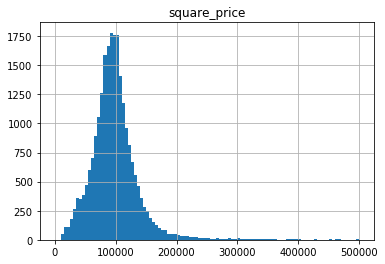

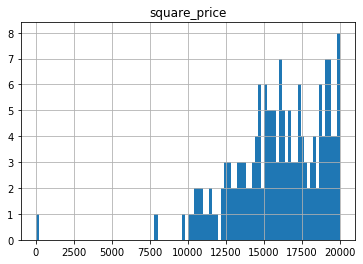

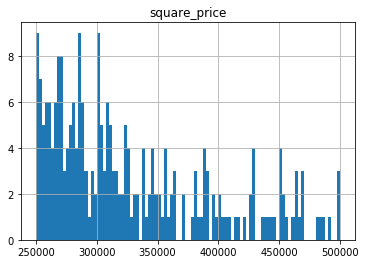

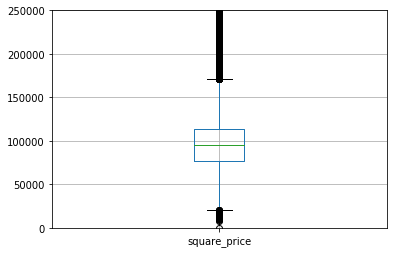

In [54]:
# Импортируем библиотеку matplotlib:
import matplotlib.pyplot as plt

#Создадим функцию для вызова гистограммы c требуемыми параметрами: 
def histogram_minmax(column, min1, max1, bins1):
    realty_data[column].hist(range=(min1, max1), bins=bins1).set_title(column)
    plt.show()
    
def histogram(column, bins1):
    realty_data[column].hist(bins=bins1).set_title(column)
    plt.show()
    
#Создадим функцию для вызова диаграммы размаха c требуемыми параметрами: 
def boxplotfunc_minmax(column, min2, max2):
    realty_data.boxplot(column)
    plt.ylim(min2, max2)
    plt.show()
    
def boxplotfunc(column):
    realty_data.boxplot(column)
    plt.show()

# Изучим параметры для столбца square_price:
print(realty_data['square_price'].describe())

histogram_minmax('square_price', 0, 500000,100)
histogram_minmax('square_price', 0, 20000,100)
histogram_minmax('square_price', 250000, 500000,100)

# Построим диаграмму размаха

boxplotfunc_minmax('square_price', 0, 250000)

Удельный показатель цены за 1 кв.м. показывает значительный разброс значений. Выделяются аномальные максимальное (1,9 млн. за кв.м.) и минимальное (112 за кв.м.) значения: складывается впечатление, что на продажу выставлялся особняк, в первом случае, и недвижимость продали за бесценок во втором. Вероятна ошибка в данных.  

В целом вид гистограммы соответствует нормальному распределению. Среднее значение на уровне около 100 тыс., медиана - 95 тыс., стандартное отклонение также велико и составляет 50 тыс., откуда можно сделать закономерный вывод о влиянии больших величин на среднее. 

Основная масса наблюдений аккумулируется возле медианного значения. Нижний ус диаграммы размаха упирается в значение около 20 тыс., в то время как верхний заканчивается на уровне около 175 тыс.: все что лежит за пределами можно считать выбросом. Видно, насколько медиана не стремится к длинному хвосту высоких значений.

Детальное рассмотрение нижних и верхних значений показывает, что для анализа подойдут наблюдения от 10 до 350 тыс. за этими границами значения достаточно малочисленны.

Проверим, насколько соответствует удельному показателю данные по столбцу *'last_price'*:

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


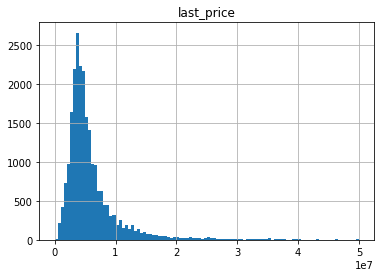

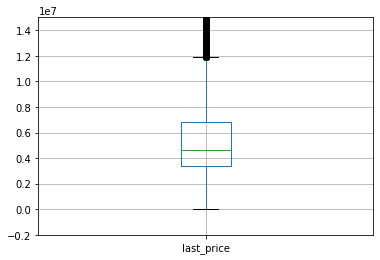

In [55]:
print(realty_data['last_price'].describe())

histogram_minmax('last_price', 0, 50000000,100)
boxplotfunc_minmax('last_price', -2000000, 15000000)

Наблюдается распределение, визуально сопоставимое с прошлым показателем.
Видны аномально высокие и низкие значения, составляющие незначительную долю наблюдений. Основная масса аккумулируется возле медианного значения 4,65 млн., значимые налюдения лежат в интервале от 0 до 12 млн.

- Параметры площади: *'living_to_total_rel'*, *'kitchen_to_total_rel'*, *'total_area'*, *'living_area'*, *'kitchen_area'*

count    23699.000000
mean         0.565191
std          0.116499
min          0.021583
25%          0.490826
50%          0.567686
75%          0.641858
max          1.000000
Name: living_to_total_rel, dtype: float64


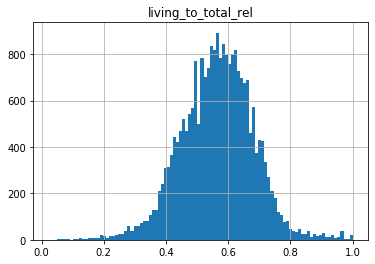

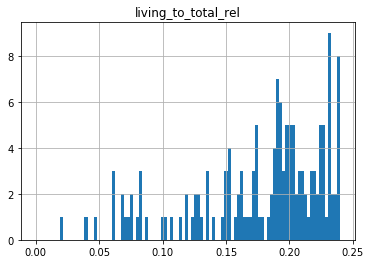

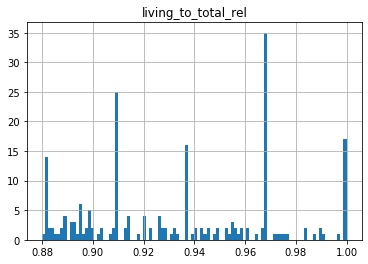

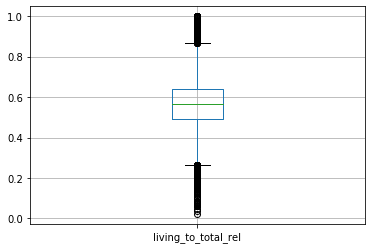

In [56]:
print(realty_data['living_to_total_rel'].describe())
histogram('living_to_total_rel', 100)
histogram_minmax('living_to_total_rel', 0, 0.24, 100)
histogram_minmax('living_to_total_rel', 0.88, 1, 100)
boxplotfunc('living_to_total_rel')

Распределение наблюдений по показателю соотношения жилой площади к общей визуально очень близко к нормальному. Максимальные значения равны 1, что означает равенство жилой и общей площади, но таких значений немного, как и минимальных (0,02).

Среднее значение практически совпадает с медианным ~ 0.57, стандартное отклонение находится в пределах 0,12. Нижний ус диаграммы размаха упирается в значение около 0,24, в то время как верхний заканчивается на уровне около 0,88.

Детальное рассмотрение нижних и верхних значений показывает, что для анализа подойдут наблюдения от 0,15 до 1. За этими границами значения достаточно малочисленны.

count    23699.000000
mean         0.189452
std          0.075799
min          0.018200
25%          0.133656
50%          0.173913
75%          0.234615
max          0.787879
Name: kitchen_to_total_rel, dtype: float64


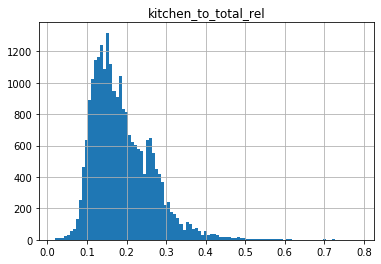

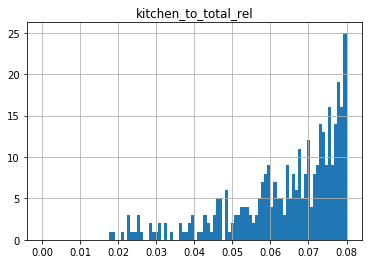

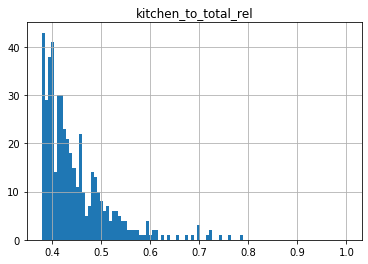

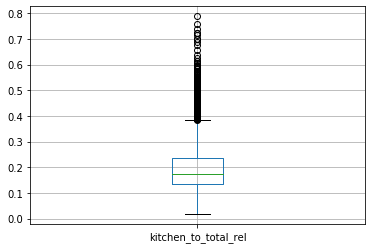

In [57]:
print(realty_data['kitchen_to_total_rel'].describe())
histogram('kitchen_to_total_rel', 100)
histogram_minmax('kitchen_to_total_rel', 0, 0.08, 100)
histogram_minmax('kitchen_to_total_rel', 0.38, 1, 100)
boxplotfunc('kitchen_to_total_rel')

Распределение по показателю соотношения площади кухни к общей уже не так однозначно. До 0,25 мы видим вполне закономерную для нормального распределения картину, однако вызывает сомнение второй пик на уровне 0,27.  

Среднее значение несколько выше медианного, что свидетельствует о влиянии больших значений. Стандартное отклонение невысокое и находится в пределах 0,08. Нижний ус диаграммы размаха упирается в значение близкого к минимальному, в то время как верхний заканчивается на уровне около 0,39. 

Детальное рассмотрение нижних и верхних значений показывает, что для анализа подойдут наблюдения от 0,05 до 0,6. За этими границами значения достаточно малочисленны.

Рассмотрим, как ведет себя распределение по абсолютным показателям:

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


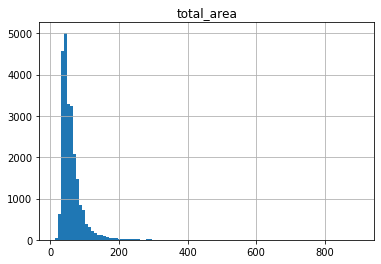

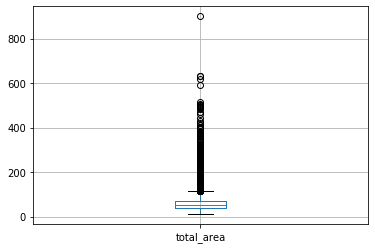

count    23699.000000
mean        34.052928
std         21.188555
min          2.000000
25%         19.000000
50%         30.000000
75%         41.100000
max        409.700000
Name: living_area, dtype: float64


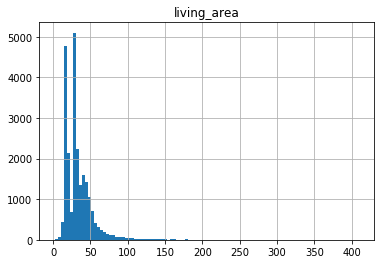

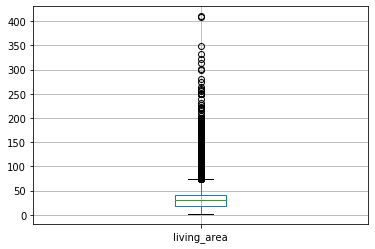

count    23699.000000
mean        10.428526
std          5.631126
min          1.300000
25%          7.400000
50%          9.100000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64


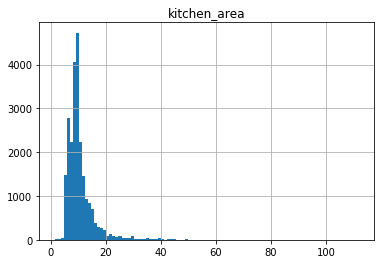

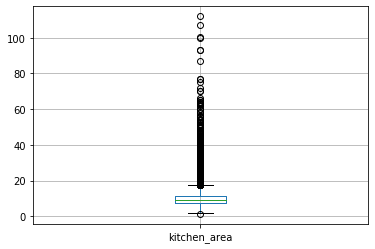

In [58]:
for columns in realty_data.loc[:,['total_area', 'living_area', 'kitchen_area']]:
    print(realty_data[columns].describe())
    histogram(columns, 100)
    boxplotfunc(columns)

Видно, что наилучшим образом построено распределение общей площади недвижимости. В показателях жилой площади и площади кухни видны дополнительные пики, что вероятно обусловлено проведенными обработками пропусков - замена пропусков на медианное значение.

- Прочие параметры: *'rooms'* и *'ceiling_height'*

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


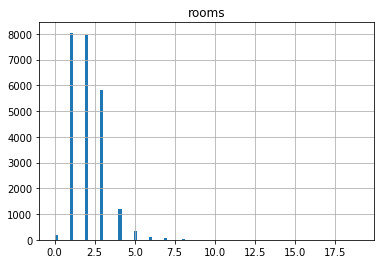

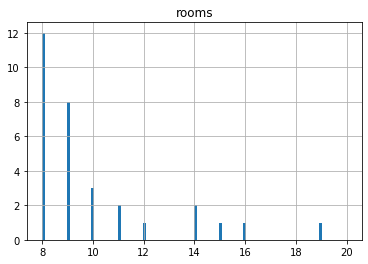

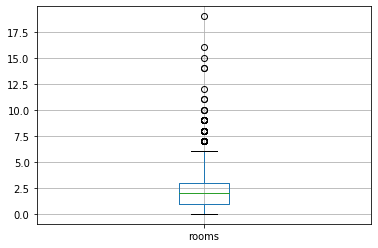

In [59]:
print(realty_data['rooms'].describe())
histogram('rooms', 100)
histogram_minmax('rooms', 8, 20, 100)
boxplotfunc('rooms')

Визуально четко можно проследить нормальное распределение. Ярко выраженный пик на значении 2, что практически совпадает со средним значением и медианой. Есть редкие значения с минимумом в точке 0 (отсутствие комнат - вероятно свободная планировка) и максимумом в точке 19. Стандартное отклонение чуть более 1. Значимы наблюдения с количеством комнат от 0 до 10.

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


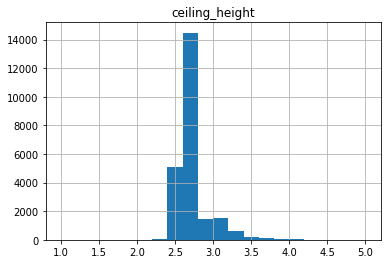

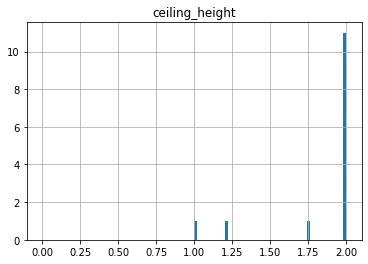

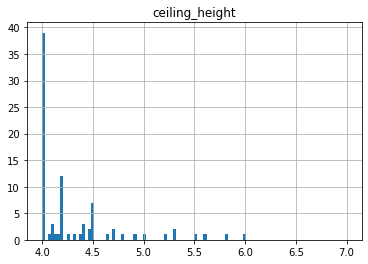

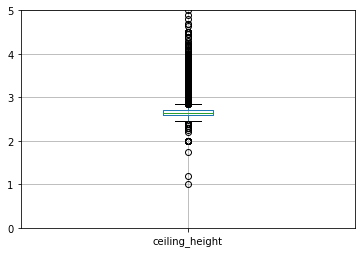

In [60]:
print(realty_data['ceiling_height'].describe())
histogram_minmax('ceiling_height', 1, 5, 20)
histogram_minmax('ceiling_height', 0, 2, 100)
histogram_minmax('ceiling_height', 4, 7, 100)
boxplotfunc_minmax('ceiling_height', 0, 5)

Показатель очень схож с предыдущим - распределение также близко к нормальному. Явные артефакты - это минимальное значение в 1 м. и максимальное 100 м. Среднее близко к медианному значению - 2,72 м. и 2,65 м. соответственно. Таких значений подавляющее большинство, что не удивительно, если учитывать среднюю высоту потолка при застройке 2,7 м.
Выбросы находятся за пределами интервала (2.45, 2,85). При этом значимыми наблюдениями можем признать квартиры с высотой потолков от 2 до 6 м.


**Вывод:**  

Распределения по обозначенным показателям близки к нормальным. Диаграммами размаха и гистограммами мы визуализировали имеющиеся данные, и определили выбросы, от которых можно избавиться.

### Исследование времени продажи квартиры

Изучим данные в столбце *'days_exposition'*:

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64


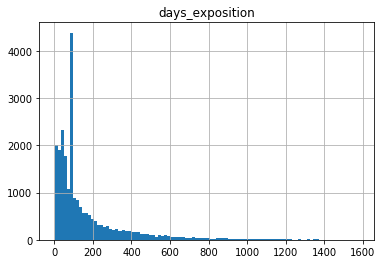

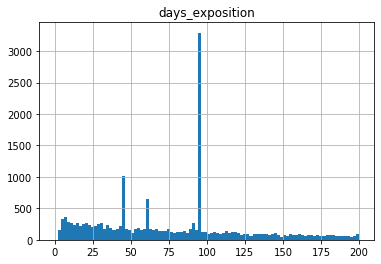

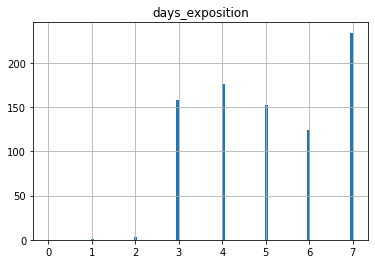

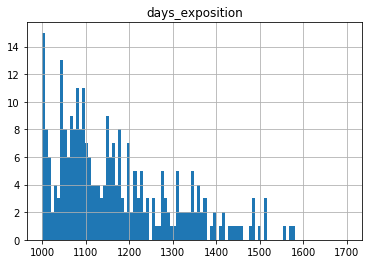

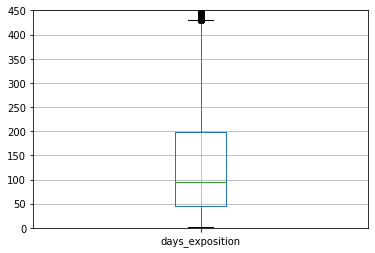

In [61]:
print(realty_data['days_exposition'].describe())
histogram('days_exposition', 100)
histogram_minmax('days_exposition', 0, 200, 100)
histogram_minmax('days_exposition', 0, 7, 100)
histogram_minmax('days_exposition', 1000, 1700, 100)
boxplotfunc_minmax('days_exposition', 0, 450)

Согласно полученным данным, среднее время продажи недвижимости составляет 169 дней, медианное время располагается на значении 95 дней. Обычно на продажу требуется потратить от 45 до 200 дней, однако можно найти как и более быструю продажу, которая занимает пару дней, так и очень долгую, которая тянется более 4 лет.  
Из гистограммы первой недели видно, что более активное снятие недвижимости с продажи начинается с 3 третьего дня. Имеются единичные значения на первом и втором дне, которыми можно пренебречь.  
Очень мало значений, превышающих 1000 дней. Гипотетически, возможна ситуация, когда покупатель находится на большем сроке, однако можно выделить условную границу в 1095 дней (3 года), после которой продавец скорее всего перестанет искать покупателя и снимет объявление.

### Исключение редких и выбивающихся значений

По итогам изучения вышеописанных параметров, можно исключить редкие и выбивающиеся значения, находящиеся за пределами следующих интервалов:
 - для цены: от 10 до 350 тыс.
 - для площади:  0,15 до 1 для соотношения жилой площади, и от 0,05 до 0,6 для соотношения площади кухни к общей
 - для количества комнат: от 0 до 10
 - для высоты потолка: от 2 до 6 м.

В отношении показателя сроков размещения объявлений крайне странными выглядят пики на 45, 60 и 90 днях. Лучше всего уточнить у бизнеса, каким образом могли возникнуть данные значения. Можно выдвинуть предположение о том, что это контрольные точки после которых объявление автоматически снимается с площадки.  

Таким образом, чистоту данных нам скорее всего обеспечат объявления, срок размещения которых лежит в интервале от 3 до 1095 дней, за исключением 45, 60 и 90 дней.

Составим срезы и сохраним их в итоговый DataFrame:

In [62]:
good_realty_data = realty_data.loc[(realty_data['square_price'] >= 10000) & (realty_data['square_price'] <= 350000) &
                                   (realty_data['living_to_total_rel'] >= 0.15) & (realty_data['living_to_total_rel'] <= 1) &
                                   (realty_data['kitchen_to_total_rel'] >= 0.05) & (realty_data['kitchen_to_total_rel'] <= 0.6) &
                                   (realty_data['rooms'] > 0) & (realty_data['rooms'] < 10) &
                                   (realty_data['ceiling_height'] >= 2) & (realty_data['ceiling_height'] <= 6) &
                                   (realty_data['days_exposition'] >= 3) & (realty_data['days_exposition'] <= 1095) &
                                   (realty_data['days_exposition'] != 45) & (realty_data['days_exposition'] != 60) &
                                   (realty_data['days_exposition'] != 90)]

display(good_realty_data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,lemmatized_locality_name,square_price,weekday_exposition,month_exposition,year_exposition,floor_position,living_to_total_rel,kitchen_to_total_rel
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,95,санкт-петербург,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,502.0,81,шушар,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,574.0,558,санкт-петербург,92785.714286,3,8,2015,другой,0.612500,0.148214
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121,санкт-петербург,100000.000000,1,6,2018,другой,0.320000,0.410000
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.4,5,False,...,502.0,55,янино-1,95065.789474,0,9,2018,другой,0.473684,0.299342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.0,8,False,...,675.0,239,петергоф,73717.948718,4,8,2016,другой,0.641026,0.128205
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,381.0,95,санкт-петербург,72490.845228,1,3,2017,другой,0.547792,0.103356
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,502.0,95,рождествено,44091.710758,6,2,2018,первый,0.523810,0.160494
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,30.0,12,False,...,196.0,602,санкт-петербург,149511.400651,1,3,2017,другой,0.390879,0.303583


На выходе нами получен DataFrame `good_realty_data`, очищенный от влияния редких и выбивающихся значений.

### Анализ влияния различных факторов на стоимость недвижимости

Оценим влияние факторов площади, числа комнат и удаленности от центра на стоимость недвижимости. Найдем коэффициенты корреляции и выведем матрицу диаграмм рассеяния:

In [63]:
# Составим таблицу коэффициентов корреляции до и после обработки для столбца *'square_price'*:
correlation_compare_square_price_dict = {'before': realty_data.corr().loc['square_price'], 
                                         'after': good_realty_data.corr().loc['square_price']}
correlation_compare_square_price = pd.DataFrame(correlation_compare_square_price_dict)
display(correlation_compare_square_price.sort_values('after', ascending=False))

# Для столбца *'last_price'*
correlation_compare_last_price_dict = {'before': realty_data.corr().loc['last_price'], 
                                       'after': good_realty_data.corr().loc['last_price']}
correlation_compare_last_price = pd.DataFrame(correlation_compare_last_price_dict)
display(correlation_compare_last_price.sort_values('after', ascending=False))

,before,after
square_price,1.000000,1.000000
last_price,0.736499,0.675785
kitchen_area,0.360807,0.368239
ponds_around3000,0.304363,0.312722
parks_around3000,0.291687,0.302215
ceiling_height,0.099837,0.296974
total_area,0.301960,0.235169
floors_total,0.148034,0.227371
kitchen_to_total_rel,0.121480,0.192296
floor,0.129068,0.182944


,before,after
last_price,1.000000,1.000000
total_area,0.653675,0.807558
living_area,0.540821,0.696984
square_price,0.736499,0.675785
kitchen_area,0.440316,0.600421
rooms,0.363343,0.502098
ceiling_height,0.064425,0.417835
ponds_around3000,0.208621,0.270730
parks_around3000,0.197840,0.270436
total_images,0.104473,0.140956


Мы видим, что на стоимость квадратного метра наиболее сильное влияние оказывают следующие параметры:  
- собственно цены на квартиру - логичная и наиболее сильная прямая зависимость, после проведенных обработок влияние ослабло;
- второй по величине коэффициент - площадь кухни, после обработок значение показателя особо не поменялось;
- общая пощадь и жилая площадь влияют на цену еще слабее, показывают также прямую зависимость, после обработок их влияние заметно сократилось;
- показатели отношений площадей показывают также достаточно низкую корреляцию с ценой, при этом чем больше площадь кухни, тем выше цена, но в случае с жилой площадью наблюдается обратная картина; оба показателя усилили влияния после обработок;
- показатель высоты потолков также достаточно посредственно влияет на стоимость, однако находится гораздо выше прочих параметров, влияние значительно выросло после проведенных обработок; 
- показатель количества комнат обладает одним из наименьших коэффициентов корреляции, что говорит о крайне слабой связи;
- удаленность от центра так же имеет средний коэффициент корреляции, что показывает определенную обратную зависимость. 
Кроме этого, одними из значимых в ценообразовании являются показатели наличия в окрестностях наличия парков и водоемов.  

В отношении показателя *'last_price'* ситуация схожа по рассматриваемым параметрам. Не беря во внимание логичную зависимость от площадей и числа комнат, есть разница в показателях отношений площадей, где наблюдается противоположная картина - зависимость площади кухни от общей теперь отрицательна и обладает большей степенью, чем отношение жилой.

Рассмотрим матрицы диаграмм рассеяния для параметров площадей: 

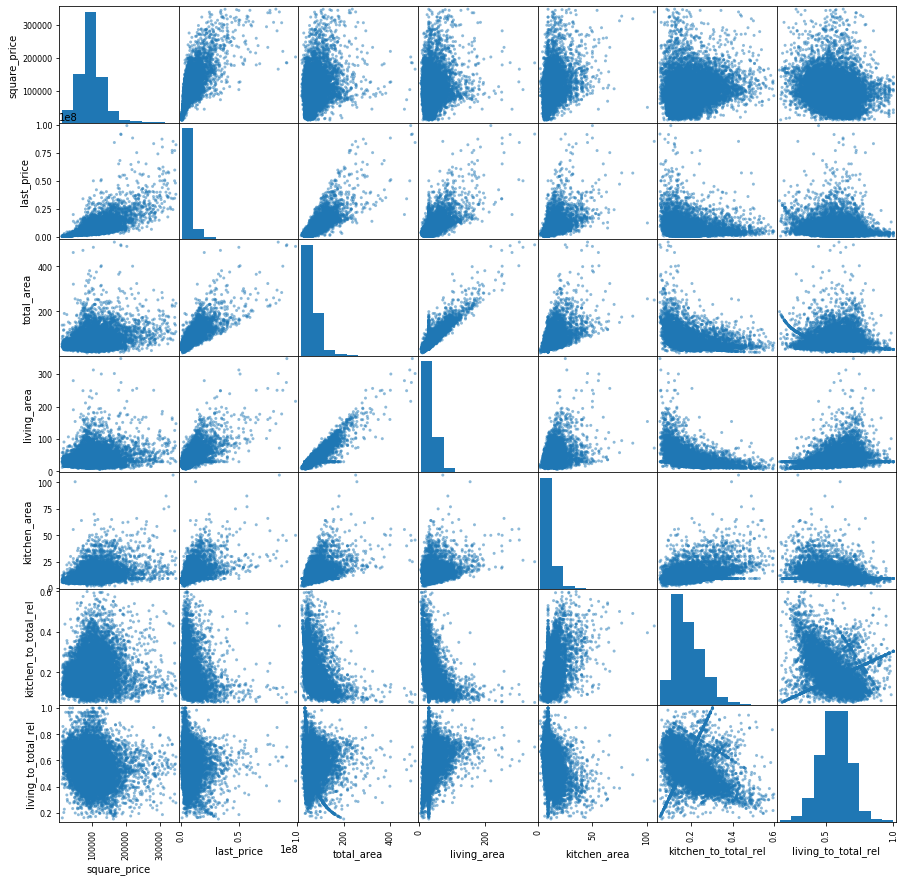

In [64]:
# Создадим новый DataFrame, в котором оставим только столбцы с параметрами площади и стоимостей:
good_realty_data_price_to_area = good_realty_data.loc[:,['square_price', 'last_price', 'total_area', 'living_area', 
                                                         'kitchen_area', 'kitchen_to_total_rel', 'living_to_total_rel']]

pd.plotting.scatter_matrix(good_realty_data_price_to_area, figsize=(15, 15))
plt.show()

По диаграмма рассеяния видно, что основную массу объявлений составляют предложения от 20 до 200 тыс. за квадрат и общей стоимостью до 250 тыс. Диаграммы разброса цены и площадей в абсолютном выражении визуально идентичны между собой, большинство наблюдений аккумулируется так же в интервале от 20 до 200 тыс. и на площадях до примерно половины максимального значения по каждому параметру. 
По отношению площади кухни к общей можно сказать, что наиболее дешевые квартиры обладают также достаточно низким показателем данного параметра, чего не скажешь об отношении жилой площади к общей, где большинство значений лежит в промежутке от 0,2 до 0,8.  

Также на матрице диаграмм можно наглядно увидеть посчитанные медианные значения для показателей площадей.

Рассмотрим матрицы диаграмм рассеяния для параметров количества комнат и удаленности от центра:

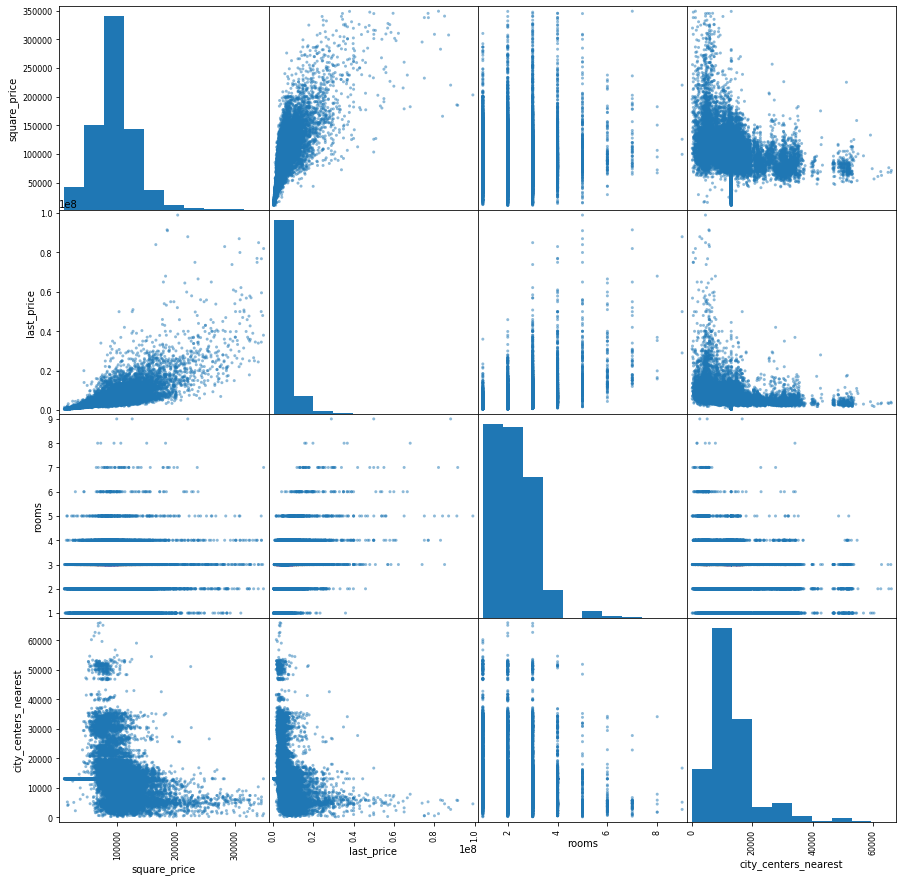

In [65]:
# Создадим новый DataFrame, в котором оставим только столбцы с рассматриваемыми параметрами:
good_realty_data_price_to_rooms_center = good_realty_data.loc[:,['square_price', 'last_price', 'rooms','city_centers_nearest']]

pd.plotting.scatter_matrix(good_realty_data_price_to_rooms_center, figsize=(15, 15))
plt.show()

В отношении количества комнат мы видим, что основную массу объявлений составляют квартиры от 1 до 3 комнат, при этом самые распространенные трехкомнатные квартиры представлены практически на всей ценовой оси. Квартиры от 8 и более комнат крайне редки. Начиная от пятикомнатных, видна прямая связь роста стоимости от количества комнат.  

Что же касается удаленности от центра, то видна логичная обратная связь стоимости и удаленности от центра: при этом основная масса наблюдений проходит на уровне около 70 тыс. за кв.м. Также четко видно медианное значение, которое мы использовали при заполнении пропусков. 

Рассмотрим матрицы диаграмм рассеяния для этажа, на котором располагается квартира. Для проведения анализа, этого создадим столбце с индексами, который будет обозначать варианты:

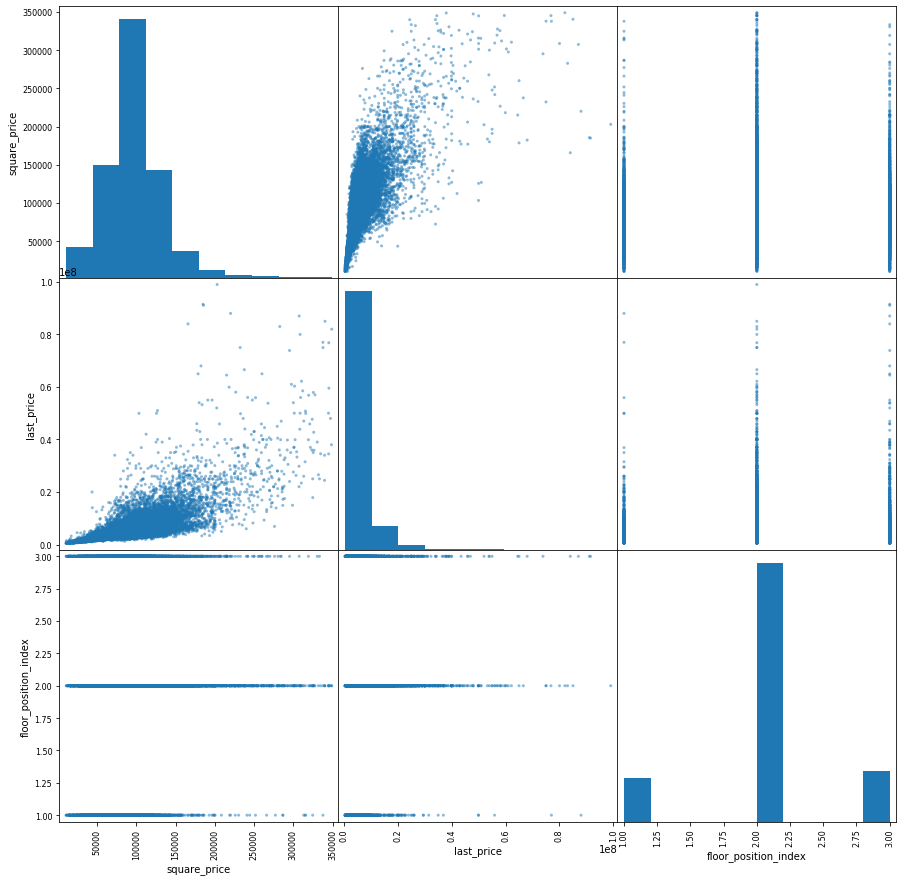

In [66]:
# Убираем предупреждение:
pd.set_option('mode.chained_assignment', None)

# Создадим столбец с индексами для числового обозначения вариантов расположения на этаже:
def floor_indexes(row):
    floor_position = row['floor_position']
    if floor_position == 'другой':
        return 2
    elif floor_position == 'первый':
        return 1
    return 3

# Проверка работы функции
row_columns = ['floor_position']
#row_values = ['первый']
##row_values = ['последний']
###row_values = ['другой']
#row = pd.Series(data=row_values, index=row_columns)
#display(floor_indexes(row))

good_realty_data['floor_position_index'] = good_realty_data.apply(floor_indexes, axis=1)

# Создадим новый DataFrame, в котором оставим только столбцы с рассматриваемыми параметрами:
good_realty_data_price_to_floor_position = good_realty_data.loc[:,['square_price', 'last_price', 'floor_position_index']]

pd.plotting.scatter_matrix(good_realty_data_price_to_floor_position, figsize=(15, 15))
plt.show()

# Убираем предупреждение:
pd.set_option('mode.chained_assignment', None)

Анализ зависимости параметра цены за квадратный метр показывает, что предложения о продаже квартир, находящихся на первом этаже чаще выставляют по более низким ценам, чем те, что расположены на последнем, и гораздо реже превышают цену тех, которые располагаются на прочих этажах. 

Рассмотрим матрицы диаграмм рассеяния для дат размещения объявлений:

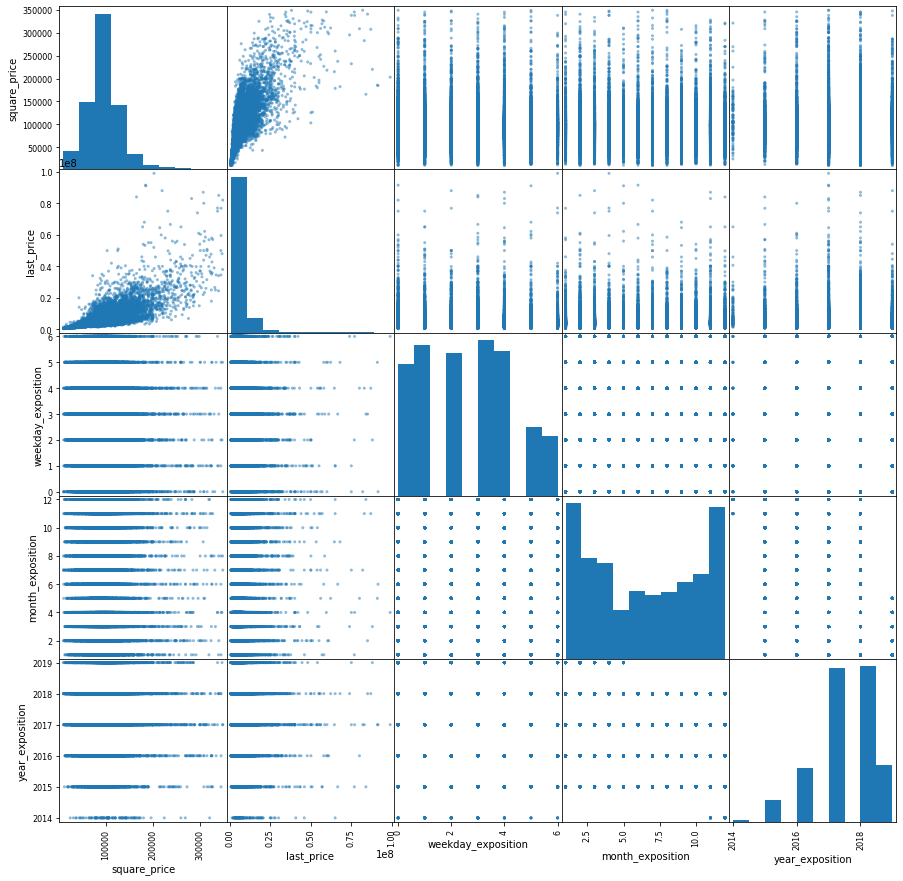

In [67]:
good_realty_data_price_to_date = good_realty_data.loc[:,['square_price', 'last_price', 'weekday_exposition', 'month_exposition', 'year_exposition']]

pd.plotting.scatter_matrix(good_realty_data_price_to_date, figsize=(15, 15))
plt.show()

Проследим зависимость цены за квадратный метр от даты размещения:  

- по дням недели видна примерно одинаковая картина по цене: несколько выделяются данные за выходные (в эти дни чаше размещали более дешевую недвижимость) и в пятницу (наоборот - чаще размещалась более дорогая);
- по месяцам по самым дорогостоящим квартирам выделяются зимние и летние месяцы, причем наиболшее количество объявлений выпадают на конец одного года и начало другого;  
- наиболшее количество объявлений зафиксировано в 2017 и 2018 гг., при этом скорее всего данные представлены за 2019 неполный год. Стоимость жилья с 2014 года (наиболее низкие значения) достигает наивысших значений в 2017 и 2019 гг. В целом виден рост цен за один квадратный метр к 2019 году. 

### Анализ изменения цены в населённых пунктах с наибольшим числом объявлений

Сгруппируем итоговый DataFrame по населенным пунктам, посчитаем для них средню цену за квадратный метр и выведем первые 10 строк:

In [68]:
realty_data_Largest_locality_pivot=(good_realty_data.pivot_table(index='lemmatized_locality_name', 
                                                                 values='square_price').sort_values(by='square_price', 
                                                                                                    ascending=False).head(10))
display(realty_data_Largest_locality_pivot)

,square_price
lemmatized_locality_name,
санкт-петербург,111688.741676
репино,108075.728806
зеленогорск,106043.631251
пушкин,103523.972570
сестрорецк,101654.308889
левашово,96997.690531
кудрово,94869.794731
мистолово,93098.851931
парголовый,90688.588716


Из представления видно, что дороже всего продают недвижимость в Санкт-Петербурге, завершает топ-10 самых дорогих мест - посёлок Стрельна.

### Анализ изменения цены по степени удалённости от центра

Рассчитаем среднюю цену квадратного метра для каждого километра, расположенного от центра Санкт-Петербурга только для этого города.

In [69]:
# Создадим срез данных по населенному пункту Санкт-Петербург:
realty_data_spb = good_realty_data.query('lemmatized_locality_name == "санкт-петербург"')

# Создаем столбец с расстояниями до центра в километрах:
def meters_to_kilometers(row):
    city_centers_nearest = row['city_centers_nearest']
    km = city_centers_nearest / 1000
    return km

realty_data_spb['city_centers_nearest_km'] = realty_data_spb.apply(meters_to_kilometers, axis=1).round().astype('int')

# Проверка
#display(realty_data_spb)

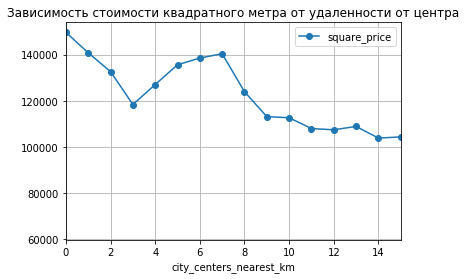

In [70]:
# Создадим сводную таблицу со средним значением стоимости квадратного метра:
realty_data_spb_pivot_for_km = (realty_data_spb.
                                pivot_table(index='city_centers_nearest_km', values='square_price'))
realty_data_spb_pivot_for_km
# Построим график зависимости цены от удаленности от центра:
realty_data_spb_pivot_for_km.plot(title='Зависимость стоимости квадратного метра от удаленности от центра', 
                                  xlim=(0,15), style='o-', grid=True)
plt.show()

По графику можно определить центральную зону, котора проходит на границе 7 км. Наблюдается также просадка стоимости на 3 км, однако с учетом дальнейшего роста можно выдвинуть предположение о наличии какой-либо незаселенной местности в этом радиусе.
Начиная с 8 км. стоимость жилья начинает резко падать.

### Сравнение выводов по квартирам в центре Санкт-Петербурга и общих выводов по всему городу

Сохраним в новом DF `realty_data_spb_city_center` все объявления по продаже недвижимости в центр Санкт-Петербурга:

In [71]:
# Сохраним в новом DF срез центральной зоны:
realty_data_spb_city_center = realty_data_spb.query('city_centers_nearest_km <= 7')
display(realty_data_spb_city_center)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,lemmatized_locality_name,square_price,weekday_exposition,month_exposition,year_exposition,floor_position,living_to_total_rel,kitchen_to_total_rel,floor_position_index,city_centers_nearest_km
24,8,6500000.0,97.20,2015-10-31,2,2.65,3,46.5,1,False,...,санкт-петербург,66872.427984,5,10,2015,первый,0.478395,0.201646,1,2
35,6,15500000.0,149.00,2017-06-26,5,2.65,5,104.0,4,False,...,санкт-петербург,104026.845638,0,6,2017,другой,0.697987,0.114094,2,4
51,7,45000000.0,161.00,2017-10-17,3,3.20,8,38.0,4,False,...,санкт-петербург,279503.105590,1,10,2017,другой,0.236025,0.310559,2,7
52,20,11795000.0,136.00,2017-09-22,6,3.00,2,94.0,2,False,...,санкт-петербург,86727.941176,4,9,2017,последний,0.691176,0.080882,3,7
61,18,7990000.0,74.00,2017-08-24,2,2.65,4,43.0,4,False,...,санкт-петербург,107972.972973,3,8,2017,последний,0.581081,0.270270,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23665,11,4250000.0,47.00,2016-05-20,1,2.65,6,18.2,1,False,...,санкт-петербург,90425.531915,4,5,2016,первый,0.387234,0.310638,1,5
23681,13,5250000.0,43.00,2018-05-11,2,2.50,5,29.0,2,False,...,санкт-петербург,122093.023256,4,5,2018,другой,0.674419,0.139535,2,7
23690,3,5500000.0,52.00,2018-07-19,2,2.65,5,31.0,2,False,...,санкт-петербург,105769.230769,3,7,2018,другой,0.596154,0.115385,2,6
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,False,...,санкт-петербург,129903.978052,3,10,2016,другой,0.552812,0.145405,2,4


Сравним полученные срезы по Санкт_Петербургу в целом и в его центре по параметрам  площади, цены, числу комнат, высоты потолков.

In [72]:
# Рассмотрим данные по обозначенным показателям:
print('Данные по Санкт-Петербургу:')
display(realty_data_spb.loc[:,['total_area', 'living_area', 'kitchen_area', 'living_to_total_rel', 
                               'kitchen_to_total_rel', 'square_price', 'last_price', 'rooms', 'ceiling_height']].describe())
print('Данные по центральной части Санкт-Петербурга:')
display(realty_data_spb_city_center.loc[:,['total_area', 'living_area', 'kitchen_area', 'living_to_total_rel', 
                                           'kitchen_to_total_rel', 'square_price', 'last_price', 'rooms', 'ceiling_height']].describe())

Данные по Санкт-Петербургу:


,total_area,living_area,kitchen_area,living_to_total_rel,kitchen_to_total_rel,square_price,last_price,rooms,ceiling_height
count,14447.000000,14447.000000,14447.000000,14447.000000,14447.000000,14447.000000,1.444700e+04,14447.000000,14447.000000
mean,63.308227,35.948542,10.868640,0.563898,0.186022,111688.741676,7.324509e+06,2.161833,2.719576
std,34.573925,21.858360,5.934437,0.111899,0.072995,33848.768289,6.141769e+06,1.068006,0.239658
min,14.000000,6.000000,2.000000,0.151592,0.050209,15345.268542,1.190000e+06,1.000000,2.000000
25%,42.000000,20.000000,7.400000,0.495078,0.132530,90765.490587,4.200000e+06,1.000000,2.600000
50%,55.000000,30.500000,9.100000,0.567315,0.170968,104347.826087,5.500000e+06,2.000000,2.650000
75%,74.000000,43.100000,12.000000,0.639936,0.229730,123500.495671,8.000000e+06,3.000000,2.750000
max,507.000000,347.500000,107.000000,1.000000,0.594595,348936.170213,9.900000e+07,9.000000,5.500000


Данные по центральной части Санкт-Петербурга:


,total_area,living_area,kitchen_area,living_to_total_rel,kitchen_to_total_rel,square_price,last_price,rooms,ceiling_height
count,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3.129000e+03,3129.000000,3129.000000
mean,88.057277,50.878137,13.733349,0.570689,0.172001,133294.975618,1.199966e+07,2.775647,2.935788
std,48.439937,32.602248,8.139471,0.126322,0.082163,49611.477734,9.891036e+06,1.297068,0.359633
min,17.000000,6.000000,2.000000,0.151592,0.050209,15345.268542,1.800000e+06,1.000000,2.400000
25%,56.000000,30.000000,9.000000,0.500000,0.115789,99253.731343,6.550000e+06,2.000000,2.650000
50%,77.000000,43.000000,11.200000,0.590517,0.150943,121637.426901,8.920262e+06,3.000000,2.800000
75%,107.000000,62.700000,16.000000,0.660377,0.205128,152459.016393,1.350000e+07,3.000000,3.150000
max,507.000000,347.500000,107.000000,1.000000,0.560526,348936.170213,9.900000e+07,9.000000,5.500000


Количество предложений по продаже недвижимости в центре Санкт-Петербурга составляет порядка 22% от общего их числа. Из данных видно, что площадь реализуемой среднестатистической квартиры в центре чаще всего больше тех, что располагаются вне этой области - эта закономерность касается как общей площади, так и площади кухни, жилой площади, отношению жилой площади к общей (кроме отношения площади кухни к общей). Вероятно это обусловлено строительством бюджетных жилищных комплексов вне центра, - многоквартирных домов со стандартной площадью, если сравнивать с квартирами из центра. Это отчасти подтдверждается тем, что максимальное и минимальное значение площадей относятся к объявлениям из выборки по центру Санкт-Петербурга.  Объяснение выбивания из общей тенденции параметра отношения площади кухни к общей может объясняться целевоым контингентом жилищных комплексов - домохозяйствами.   

Вполне логичная разница в ценах: средняя и медианная цена за квадрат в центре выше чем по всему городу, при этом разница составляет примерно на 20 тыс. за 1 квадратный метр. Самая дорогая квартира находится в центральной области, самая дешевая - за ее пределами. Учитывая, что среднее значение по городу ниже среднего по центру, можно сдалать закономерный вывод о том, что стоимость квартир вне центра значительно ниже тех, что в центре.  

В отношении количества комнат можно сделать вывод о том, что по городу чаще выставляют на продажу двухкомнатные квартиры, в то время как для центра больше характерны предложения по трехкомнатным квартирам.  

В центре города чаще можно встретить недвижимость с высокими потолками: средняя и медианная высота потолков там выше, чем в целом по городу. Кроме этого, в центре минимальная высота потолков не ниже 2,4 м., в то время как на периферии она составляет 2 м.

Найдем влияние факторов числа комнат, этажа, удалённости от центра и дата размещения объявления на стоимость квартиры. Для этого вновь выведем таблицу с коэффициентами корреляции:

In [73]:
# Составим таблицу коэффициентов корреляции до и после обработки для столбца *'square_price'*:
print('Коэффициенты корреляции для показателя стоимости 1 кв.м.:')
correlation_compare_square_price_dict_spb = {'city': realty_data_spb.corr().loc['square_price'], 
                                         'city_center': realty_data_spb_city_center.corr().loc['square_price']}
correlation_compare_square_price_spb = pd.DataFrame(correlation_compare_square_price_dict_spb)
display(correlation_compare_square_price_spb.sort_values('city_center', ascending=False))

Коэффициенты корреляции для показателя стоимости 1 кв.м.:


,city,city_center
square_price,1.000000,1.000000
last_price,0.653169,0.638791
kitchen_area,0.372022,0.305043
kitchen_to_total_rel,0.218651,0.239228
floors_total,0.081511,0.231034
airports_nearest,-0.012385,0.220625
balcony,0.037579,0.185755
floor,0.097004,0.179541
total_images,0.138643,0.170729
total_area,0.216794,0.109084


Зависимость стоимости 1 квадратного метра для центральной части города от рассматриваемых показателей в целом не высока, а в некоторых случаях и ничтожна: чуть большее значение имеют показатели по числу комнат и этажа; совсем незначительное - удаленность от центра (что не удивительно - т.к. рассматриваем квартиры в центре), дата размещения. Если смотреть по всем показателям, то можно выделить относительно высокую зависимость (больше 0,2) от площади кухни, этажности здания, близости к аэропорту, наличием балконов, отношению жилой площади к общей. Также неплохою зависимость показывает показатель количества фотографий в объявлении - чем их больше, тем выше стоимость. 

Для города в целом картина немного меняется: этажность уже не так влияет на цену, количество комнат также практически не влияет на цену квадратного метра. Зато на первый план выходит показатель удаленности от центра города и показывает достаточно сильную связь. Дата размещения объявления также не оказывает практически никакого влияния на стоимость.

Таким образом, можно сделать вывод о том, что для центра Санкт-Петербурга стоимость 1 кв. м. будет выше с большей долей вероятности для квартиры с достаточно большой площадью кухни и меньшим отношением жилой площади к общей, с балконом, располагающейся в многоэтажном доме не на граничных этажах, как можно ближе к аэропорту.  

Для города в целом это будет квартира  с достаточно большой площадью, в т.ч. площадью кухни, меньшим отношением жилой площади к общей, располагающейся вблизи водоемов и парков, в непосредственной близости от центра города.

## Заключение и общие выводы по проекту

В начале исследования мы выдвинули ряд гипотез.

1. Продажа прошла очень быстро, когда срок снятия объявления составил 7 дней; чрезмерно долго - если объявление было размещалось более 1 года.  
2. Стоимость квадратного метра сильнее зависит зависит от количества комнат, чем от площади квартиры.  
3. Стоимость квадратного метра сильно зависит от удаленности от центра.  
4. Первый и последний этажи предпочитают реже, поэтому их стоимость ниже прочих.  
5. Стоимость квадратного метра растет с каждым годом в связи с инфляцией.  
6. Стоимость квадратного метра в центре Санкт-Петербурга гораздо выше, чем по всему городу в целом.  
7. Стоимость квадратного метра в центре Санкт-Петербурга гораздо больше зависит от площади и числа комнат, чем по всему городу в целом.  

В ходе исследования мы очистили первоначальные данные от выбивающихся и аномальных значений, что позволило нам более адекватно оценить влияние различных параметров на стоимость жилья в Санкт-Петербурге и окрестных населенных пунктах.

К числу таких параметров, оказывающих наибольшее влияние на стоимость квадратного метра жилья относится удаленность от центра города (чем она выше - тем выше стоимость). Параметры площади также оказывают некоторое влияние на ценообразование, при этом квартиры с большой кухней относительно общей площади чаще будут стоить дороже тех, в которых она меньше. Высота потолков также можеь повлиять на цену - чем выше потолок, тем дороже предложение. Влияние же количества комнат достаточно низкое, а даты размещения объявлений - так и совсем незначительное.  

Для Санкт-Петербурга и для его центра влияние параметров несколько снижается. Притом, если для центра характерно более высокое влияние близости к аэропорту, этажности здания, наличие балкона, то для города в целом - это близость к центру города, наличие в окрестности водоемов и парков.  

По итогам исследований: 
- гипотеза 1: не подтверждена (определенный нами интервал от 3 до 1095 дней);
- гипотеза 2: не подтверждена (наоборот, влияние площади сильнее влияния количества комнат); 
- гипотеза 3: не подтверждена (влияние есть, но оно не сильно);
- гипотеза 4: подтверждена;
- гипотеза 5: подтверждена;
- гипотеза 6: подтверждена;
- гипотеза 7: не подтверждена (зависимость от числа комнат подтверждается, а в случае площадей - больше влияние она оказывает именно на стоимость квадратного метра по городу в целом).
